<a href="https://colab.research.google.com/github/manliofrp/Actividad_3/blob/main/Actividad3_ValoresAtipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
from google.colab import files
files.upload()

Saving ventas_sin_nulos.csv to ventas_sin_nulos (1).csv


{'ventas_sin_nulos (1).csv': b',indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,ventas_totales_grupo_articulos,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros\n0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,10230100.13,6864575.384,9047205.493,1716991.073,27858872.08,18043789.16,3514467.398,6705475.318,945906.3068,2880656.169,2606192.942,1050313.638,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309\n1,01/02/2017,25994.2,25223.4,25994200.17,25749179.4,245020.769,25994200.17,9719067.341,6438494.011,8309150.301,1527488.518,25994200.17,17656879.08,3344456.931,6576624.803,925618.6147,2855639.9,2600083.591,1026166.544,328288.6

In [106]:
data = pd.read_csv('ventas_sin_nulos.csv')

In [107]:
data.isnull().sum()

Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros           

In [108]:
data1= data.copy()

1. Ventas Precios Corrientes

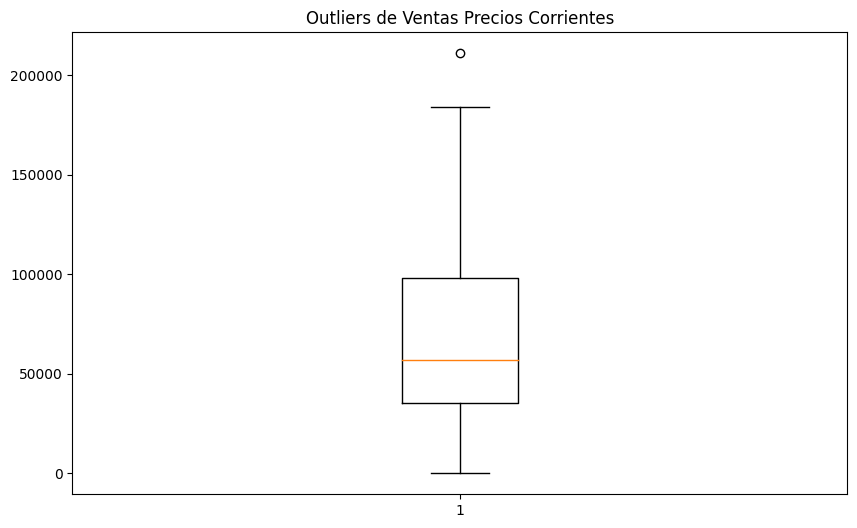

In [109]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data1["ventas_precios_corrientes"])
plt.title("Outliers de Ventas Precios Corrientes")
plt.show()

In [110]:
y = data1["ventas_precios_corrientes"]

percentile25 = y.quantile(0.25) #q1
percentile75 = y.quantile(0.75) #q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1*iqr
Limite_Inferior_iqr = percentile25 - 1*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 160882.1
Limite inferior permitido -27741.40000000001


In [111]:
outliers_iqr = data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5116430.634,1.839832e+08,56640033.15,55432191.37,...,45199914.72,5859939.041,1.627522e+07,2.126505e+07,5863700.608,1.679029e+06,21753939.73,4759532.634,1.266927e+07,1.666512e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4144283.743,1.771481e+08,53189998.68,50063972.79,...,49991675.91,6746166.557,1.930946e+07,2.287784e+07,6510665.781,1.719459e+06,23131265.85,4228053.874,3.215055e+06,1.191048e+07
64,64,01/05/2022,179639.2,23234.2,1.796392e+08,1.753585e+08,4280751.113,1.796392e+08,52738110.62,49886787.86,...,50150351.46,6667329.665,2.012112e+07,2.284153e+07,6314109.470,1.779483e+06,23578638.71,5213152.564,1.203960e+07,1.234998e+07


In [112]:
data_clean_iqr_vpc = data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr_vpc
data_clean_iqr_vpc.to_csv("data_clean_iqr_vpc.csv")

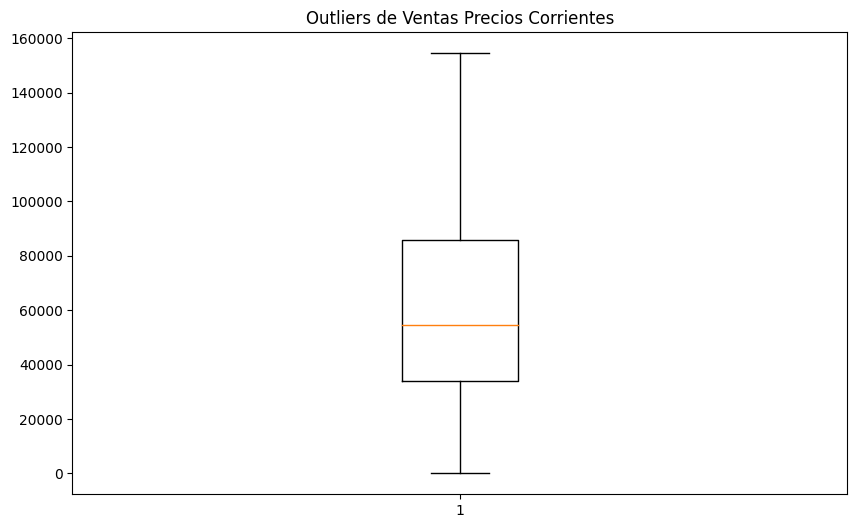

In [113]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_iqr_vpc["ventas_precios_corrientes"])
plt.title("Outliers de Ventas Precios Corrientes")
plt.show()

2. Venta Precios Constantes

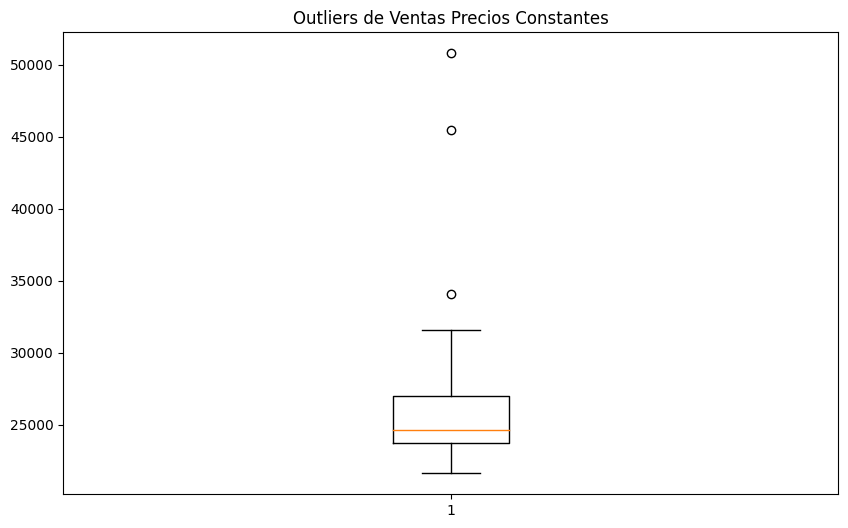

In [114]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data["ventas_precios_constantes"])
plt.title("Outliers de Ventas Precios Constantes")
plt.show()

In [115]:
y = data1["ventas_precios_constantes"]

percentile25 = y.quantile(0.25) #q1
percentile75 = y.quantile(0.75) #q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1*iqr
Limite_Inferior_iqr = percentile25 - 1*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 30291.4
Limite inferior permitido 20407.3


In [116]:
outliers_iqr = data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
11,11,01/12/2017,40766.3,34084.5,4.076632e+07,4.032029e+07,4.460368e+05,4.076632e+07,13710305.37,11070098.74,...,9.667850e+06,1346130.813,3.684165e+06,3.674954e+06,1398334.689,4.762751e+05,5.239243e+06,1278355.018,2.857323e+06,4.502834e+06
23,23,01/12/2018,57204.0,31136.1,5.720396e+07,5.645236e+07,7.515994e+05,5.720396e+07,19372979.31,16252211.76,...,1.427771e+07,1987411.831,5.209570e+06,5.446438e+06,1782265.959,6.026468e+05,7.737390e+06,1732097.963,2.850609e+06,5.985972e+06
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4.726974e+06,8.114070e+07,24935747.29,22143208.63,...,2.339304e+07,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,1.121715e+07,2502616.619,6.125266e+06,5.935994e+06
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5.116431e+06,1.839832e+08,56640033.15,55432191.37,...,4.519991e+07,5859939.041,1.627522e+07,2.126505e+07,5863700.608,1.679029e+06,2.175394e+07,4759532.634,1.266927e+07,1.666512e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,46962602.22,46053650.13,...,3.750517e+07,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,2.133021e+07,3782646.219,1.218755e+07,1.343307e+07


In [117]:
data_clean_iqr_vpco = data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr_vpco
data_clean_iqr_vpco.to_csv("data_clean_iqr_vpco.csv")

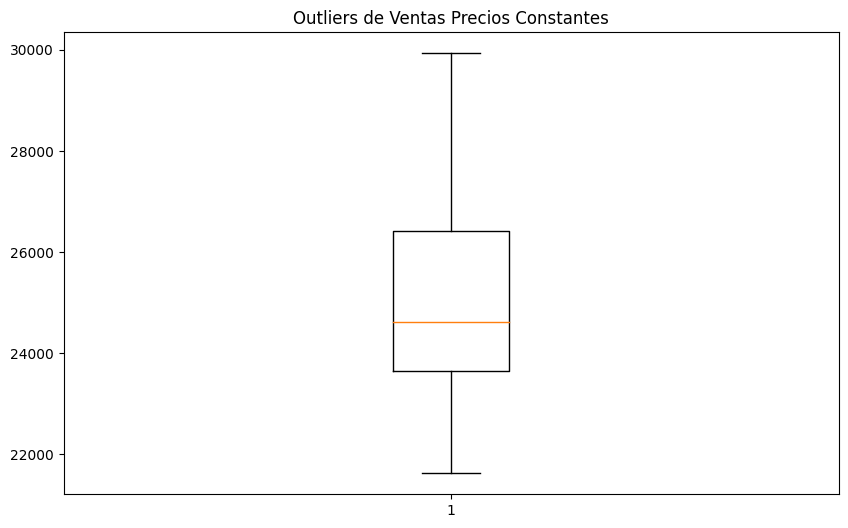

In [118]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_iqr_vpco["ventas_precios_constantes"])
plt.title("Outliers de Ventas Precios Constantes")
plt.show()

3. Salon Ventas



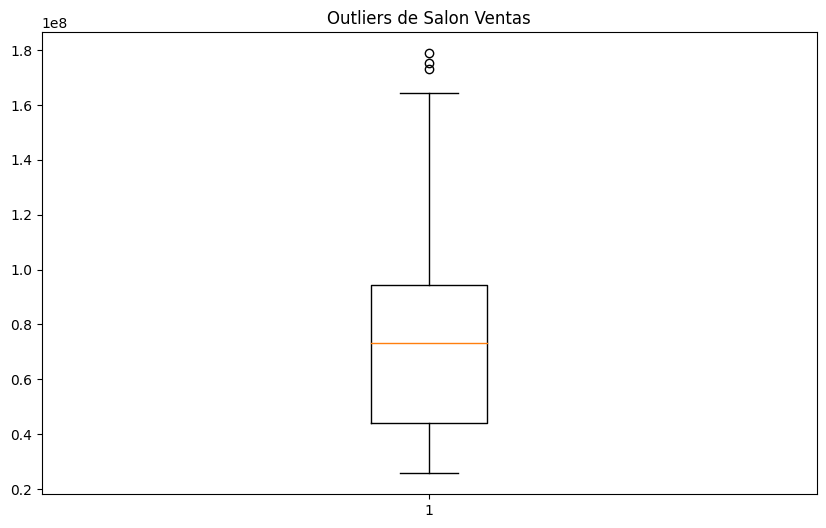

In [119]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data["salon_ventas"])
plt.title("Outliers de Salon Ventas")
plt.show()

In [120]:
y = data1["salon_ventas"]
Limite_Superior = y.mean() + 1.5*y.std()
Limite_Inferior = y.mean() - 1.5*y.std()
print("Limite  superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite  superior permitido 136721323.32640386
Limite inferior permitido 14950849.494211525


In [121]:
outliers = data1[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,1.266927e+07,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4.819480e+06,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,1.218755e+07,13433071.98
61,61,01/02/2022,152202.6,23802.1,152202573.4,148406529.3,3.796044e+06,152202573.4,46290956.21,45283575.25,...,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,1832572.100,9.189746e+06,13301387.17
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,1.089879e+07,5776003.50
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,3.215055e+06,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,1.203960e+07,12349980.06


In [122]:
data_clean_sv = data1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean_sv
data_clean_sv.to_csv("data_clean_sv.csv")

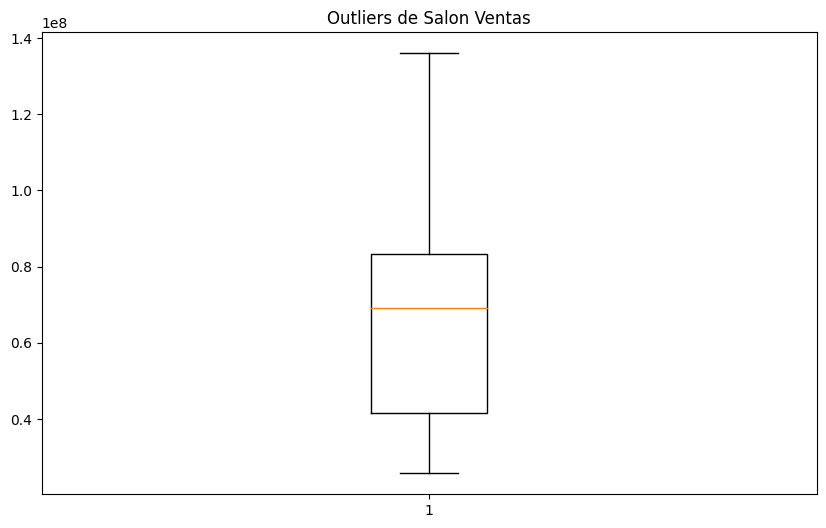

In [123]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_sv["salon_ventas"])
plt.title("Outliers de Salon Ventas")
plt.show()

4. Subtotal Ventas Alimentos Bebidas

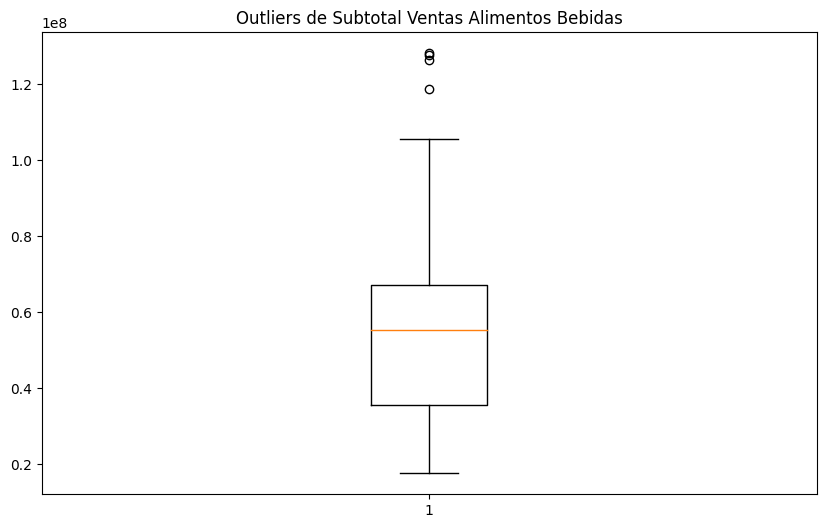

In [124]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data["subtotal_ventas_alimentos_bebidas"])
plt.title("Outliers de Subtotal Ventas Alimentos Bebidas")
plt.show()

In [125]:
y = data1["subtotal_ventas_alimentos_bebidas"]
Limite_Superior = y.mean() + 1*y.std()
Limite_Inferior = y.mean() - 1*y.std()
print("Limite  superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite  superior permitido 84538859.6376633
Limite inferior permitido 26056386.186029


In [126]:
outliers = data1[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
5,5,01/06/2017,29132.7,26365.4,2.913271e+07,2.876387e+07,3.688473e+05,2.913271e+07,1.056549e+07,7.337457e+06,...,7.911936e+06,1.083494e+06,3.322050e+06,2.883229e+06,9.522033e+05,3.451141e+05,4.277890e+06,1.001572e+06,1.893542e+06,2.358093e+06
6,6,01/07/2017,31182.3,27819.4,3.118230e+07,3.081531e+07,3.669907e+05,3.118230e+07,1.090591e+07,8.183012e+06,...,8.482568e+06,1.153102e+06,3.534097e+06,3.013144e+06,9.943436e+05,3.800082e+05,4.599798e+06,1.026743e+06,1.995091e+06,2.678009e+06
7,7,01/08/2017,31154.9,27394.1,3.115488e+07,3.076336e+07,3.915251e+05,3.115488e+07,1.104163e+07,7.899351e+06,...,8.275620e+06,1.147970e+06,3.604272e+06,2.946951e+06,1.060479e+06,3.701912e+05,4.585004e+06,7.864155e+05,1.882134e+06,3.234640e+06
8,8,01/09/2017,30521.5,26404.3,3.052151e+07,3.013560e+07,3.859105e+05,3.052151e+07,1.078917e+07,7.888243e+06,...,8.319868e+06,1.144159e+06,3.640337e+06,2.991425e+06,1.078616e+06,3.625737e+05,4.708172e+06,7.405727e+05,1.673424e+06,5.776004e+06
9,9,01/10/2017,32446.0,27766.7,3.244598e+07,3.198022e+07,4.657591e+05,3.244598e+07,1.122031e+07,8.695477e+06,...,1.712542e+07,1.171283e+06,3.698963e+06,3.091847e+06,1.147860e+06,3.811761e+05,4.889144e+06,8.704811e+05,2.404158e+06,2.538297e+06


In [127]:
data_clean_svab = data1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean_svab
data_clean_svab.to_csv("data_clean_svab.csv")

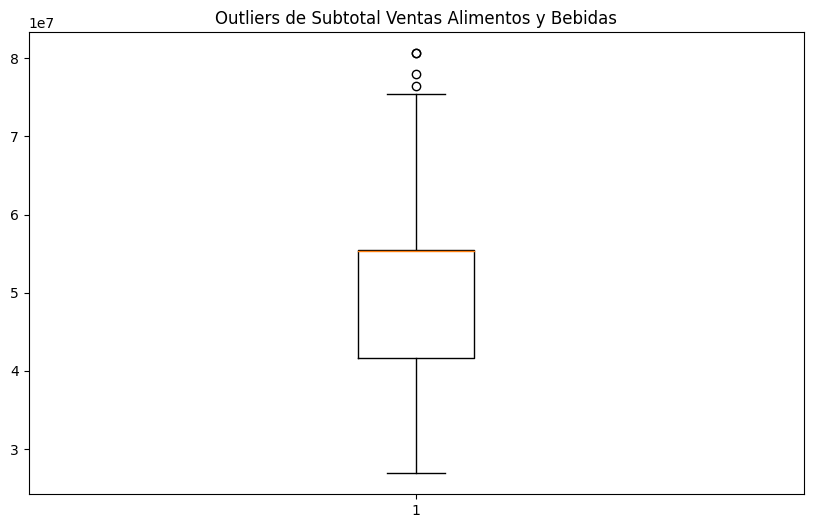

In [128]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_svab["subtotal_ventas_alimentos_bebidas"])
plt.title("Outliers de Subtotal Ventas Alimentos y Bebidas")
plt.show()

5. Panaderia

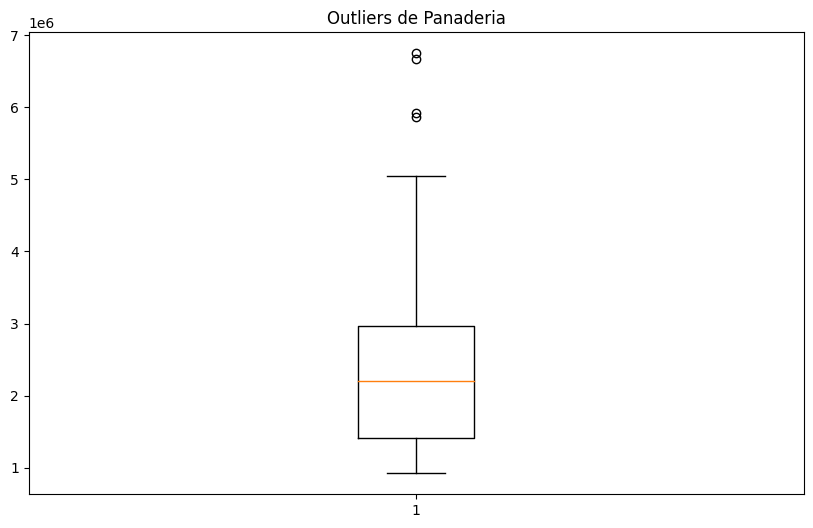

In [129]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data["panaderia"])
plt.title("Outliers de Panaderia")
plt.show()

In [130]:
y = data1["panaderia"]

percentile25 = y.quantile(0.25) #q1
percentile75 = y.quantile(0.75) #q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1*iqr
Limite_Inferior_iqr = percentile25 - 1*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 4533991.142999999
Limite inferior permitido -148404.78899999987


In [131]:
outliers_iqr = data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
57,57,01/10/2021,140487.5,25386.7,140487487.3,136000643.3,4.486844e+06,140487487.3,43323345.69,39697514.99,...,37081602.26,4773476.075,15561032.00,16349404.55,4785226.402,1226503.662,18501724.82,3328328.421,1.091989e+07,10121840.86
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,1.266927e+07,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4.819480e+06,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,1.218755e+07,13433071.98
61,61,01/02/2022,152202.6,23802.1,152202573.4,148406529.3,3.796044e+06,152202573.4,46290956.21,45283575.25,...,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,1832572.100,9.189746e+06,13301387.17
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,1.089879e+07,5776003.50
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,3.215055e+06,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,1.203960e+07,12349980.06


In [132]:
data_clean_iqr_pan = data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr_pan
data_clean_iqr_pan.to_csv("data_clean_iqr_pan.csv")

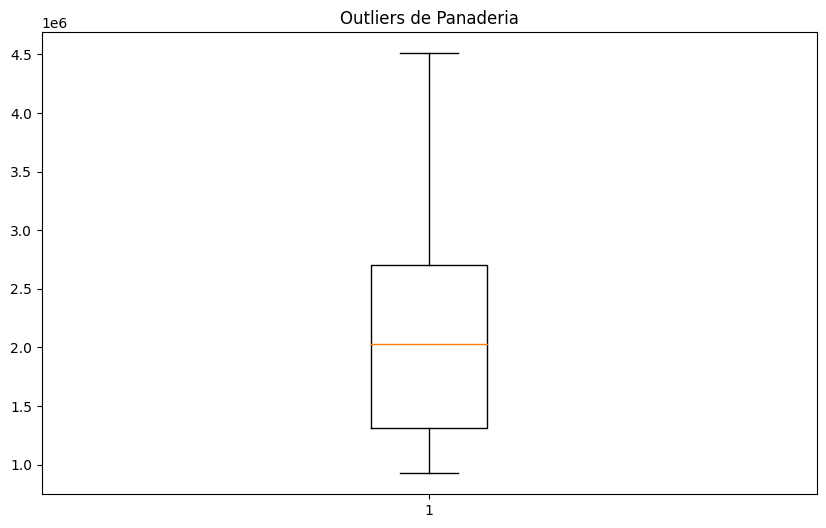

In [133]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_iqr_pan["panaderia"])
plt.title("Outliers de Panaderia")
plt.show()

6. Lacteos

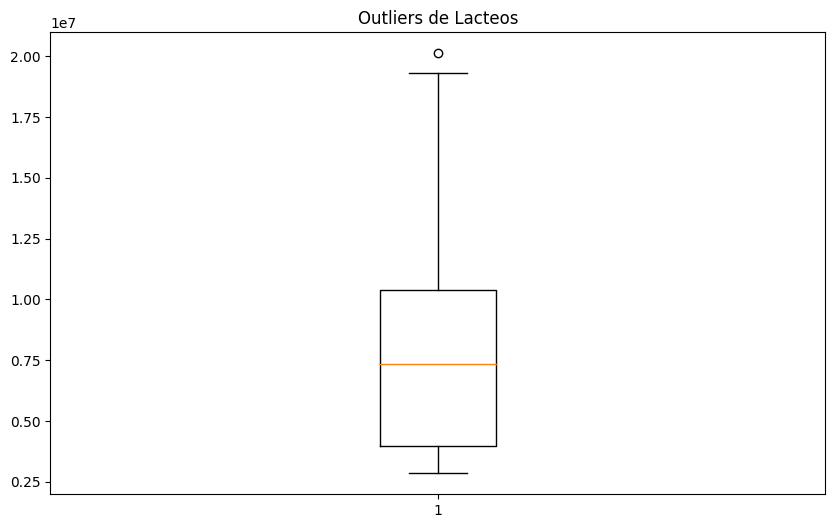

In [134]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data["lacteos"])
plt.title("Outliers de Lacteos")
plt.show()

In [135]:
y = data1["lacteos"]

percentile25 = y.quantile(0.25) #q1
percentile75 = y.quantile(0.75) #q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 19940661.0455
Limite inferior permitido -5569362.3025


In [136]:
outliers_iqr = data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [137]:
data_clean_iqr_lac = data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr_lac
data_clean_iqr_lac.to_csv("data_clean_iqr_lac.csv")

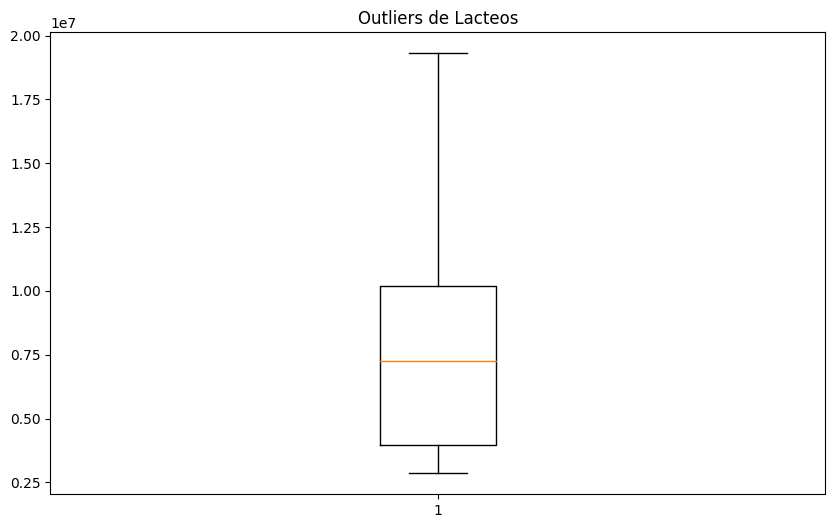

In [138]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_iqr_lac["lacteos"])
plt.title("Outliers de Lacteos")
plt.show()

7. Alimentos Preparados Rotiseria

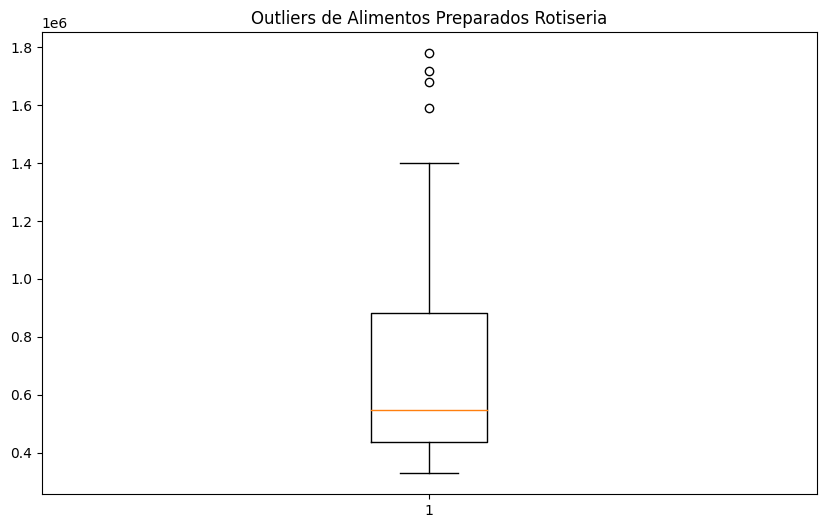

In [139]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data["alimentos_preparados_rotiseria"])
plt.title("Outliers de Alimentos Preparados Rotiseria")
plt.show()

In [140]:
y = data1["alimentos_preparados_rotiseria"]

percentile25 = y.quantile(0.25) #q1
percentile75 = y.quantile(0.75) #q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.*iqr
Limite_Inferior_iqr = percentile25 - 1.*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 1324993.0221
Limite inferior permitido -5555.677799999947


In [141]:
outliers_iqr = data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,1.266927e+07,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4.819480e+06,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,1.218755e+07,13433071.98
61,61,01/02/2022,152202.6,23802.1,152202573.4,148406529.3,3.796044e+06,152202573.4,46290956.21,45283575.25,...,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,1832572.100,9.189746e+06,13301387.17
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,1.089879e+07,5776003.50
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,3.215055e+06,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,1.203960e+07,12349980.06


In [142]:
data_clean_iqr_rot = data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr_rot
data_clean_iqr_rot.to_csv("data_clean_iqr_rot.csv")

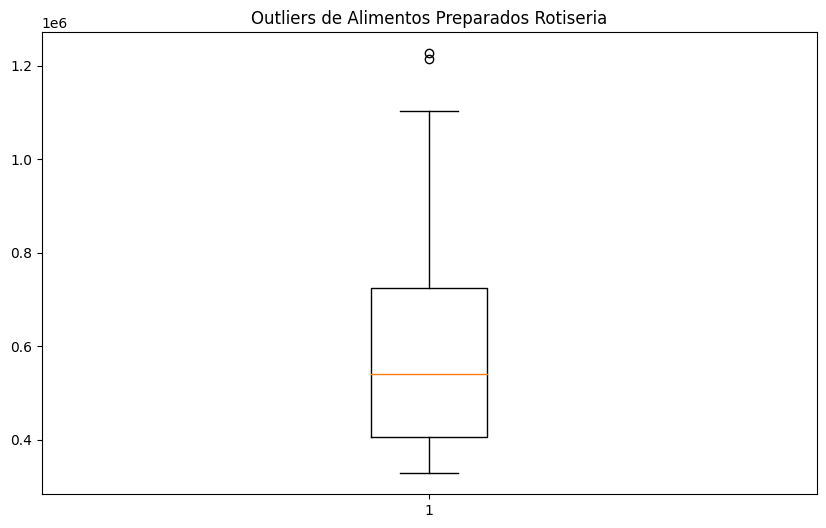

In [143]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_iqr_rot["alimentos_preparados_rotiseria"])
plt.title("Outliers de Alimentos Preparados Rotiseria")
plt.show()

8. Indumentaria Calzado Textiles Hogar

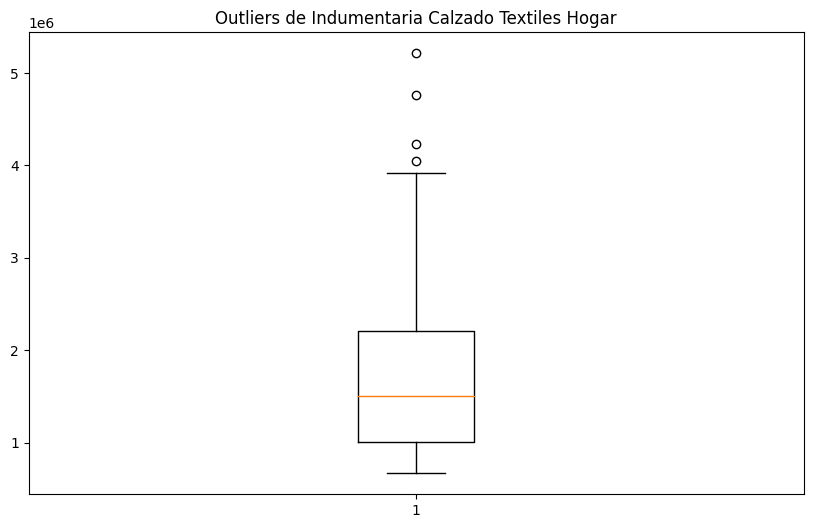

In [144]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data["indumentaria_calzado_textiles_hogar"])
plt.title("Outliers de Indumentaria Calzado Textiles Hogar")
plt.show()

In [145]:
y = data1["indumentaria_calzado_textiles_hogar"]
Limite_Superior = y.mean() + 1.5*y.std()
Limite_Inferior = y.mean() - 1.5*y.std()
print("Limite  superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite  superior permitido 3453856.0534004625
Limite inferior permitido 211288.15464876778


In [146]:
outliers = data1[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
53,53,01/06/2021,116287.9,23678.0,116287893.0,111477594.5,4.810298e+06,116287893.0,34735136.74,32637663.36,...,32622021.61,3921981.953,13537963.96,14134807.88,3748454.174,9.146226e+05,14484893.56,3640081.868,9.514179e+06,8.024885e+06
54,54,01/07/2021,125658.6,24779.5,125658552.5,120904098.3,4.754454e+06,125658552.5,37973547.56,37146178.90,...,34683058.37,4322896.980,14292062.10,15147184.63,3985101.607,1.052053e+06,15724007.71,4051857.507,9.222788e+06,9.421771e+06
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1.679029e+06,21753939.73,4759532.634,1.266927e+07,1.666512e+07
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4.819480e+06,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1.401929e+06,21330213.29,3782646.219,1.218755e+07,1.343307e+07
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1.589119e+06,22942013.09,3912852.426,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1.719459e+06,23131265.85,4228053.874,3.215055e+06,1.191048e+07
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1.779483e+06,23578638.71,5213152.564,1.203960e+07,1.234998e+07


In [147]:
data_clean_icth = data1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean_icth
data_clean_icth.to_csv("data_clean_icth.csv")

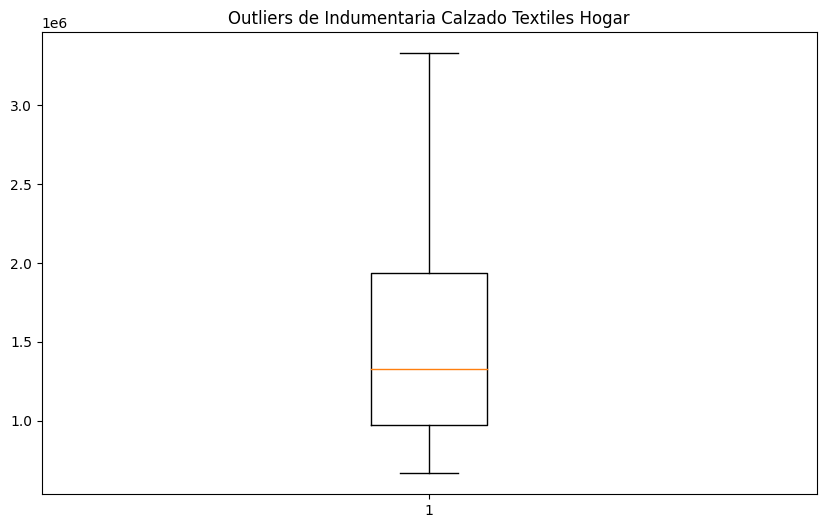

In [148]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_icth["indumentaria_calzado_textiles_hogar"])
plt.title("Outliers de Indumentaria Calzado Textiles Hogar")
plt.show()

9. Electronicos

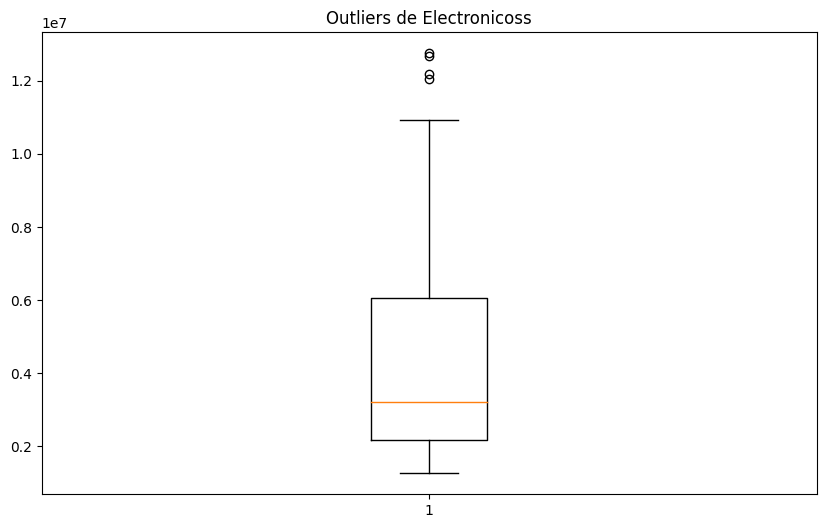

In [149]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data["electronicos_articulos_hogar"])
plt.title("Outliers de Electronicoss")
plt.show()

In [150]:
y = data1["electronicos_articulos_hogar"]
Limite_Superior = y.mean() + 1*y.std()
Limite_Inferior = y.mean() - 1*y.std()
print("Limite  superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite  superior permitido 7795016.694003869
Limite inferior permitido 1368384.5352884382


In [151]:
outliers = data1[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1026166.544,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1075525.842,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
46,46,01/11/2020,200.5,24010.7,9.109351e+07,8.625533e+07,4.838177e+06,9.109351e+07,2.883251e+07,2.355189e+07,...,2.357726e+07,2.712393e+06,9.625513e+06,9.366001e+06,4262746.600,6.308227e+05,1.260647e+07,2.071758e+06,7.962444e+06,7.539584e+06
52,52,01/05/2021,110604.7,23368.4,1.106047e+08,1.049977e+08,5.607036e+06,1.106047e+08,3.339102e+07,2.944830e+07,...,3.132843e+07,3.801495e+06,1.311654e+07,1.420490e+07,3924175.620,8.922634e+05,1.451719e+07,2.686103e+06,7.849584e+06,7.525721e+06
53,53,01/06/2021,116287.9,23678.0,1.162879e+08,1.114776e+08,4.810298e+06,1.162879e+08,3.473514e+07,3.263766e+07,...,3.262202e+07,3.921982e+06,1.353796e+07,1.413481e+07,3748454.174,9.146226e+05,1.448489e+07,3.640082e+06,9.514179e+06,8.024885e+06
54,54,01/07/2021,125658.6,24779.5,1.256586e+08,1.209041e+08,4.754454e+06,1.256586e+08,3.797355e+07,3.714618e+07,...,3.468306e+07,4.322897e+06,1.429206e+07,1.514718e+07,3985101.607,1.052053e+06,1.572401e+07,4.051858e+06,9.222788e+06,9.421771e+06
55,55,01/08/2021,124840.3,23990.1,1.248403e+08,1.201815e+08,4.658789e+06,1.248403e+08,3.818063e+07,1.995314e+07,...,3.450043e+07,2.198580e+06,1.451283e+07,1.473639e+07,4074608.926,1.087448e+06,1.592017e+07,2.944643e+06,8.443256e+06,1.048753e+07
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4.416780e+06,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4184266.093,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4785226.402,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4869397.981,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07


In [152]:
data_clean_elec = data1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean_elec
data_clean_elec.to_csv("data_clean_elec.csv")

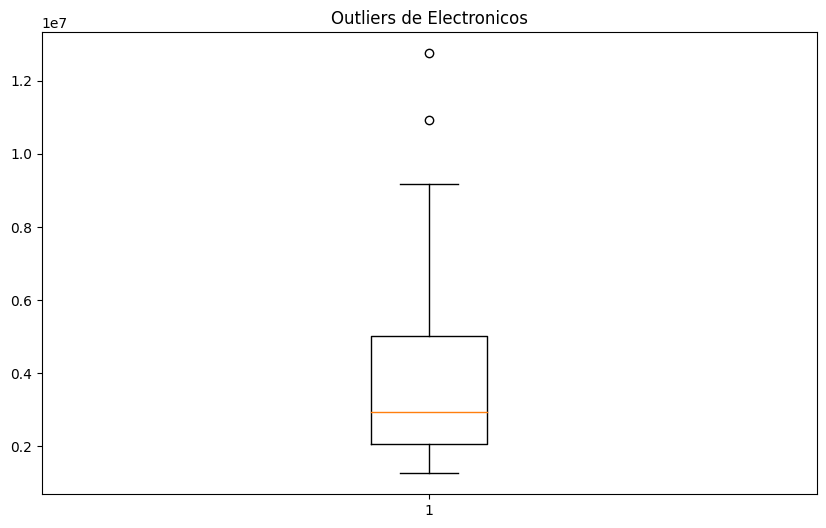

In [153]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_icth["electronicos_articulos_hogar"])
plt.title("Outliers de Electronicos")
plt.show()

10. Otros

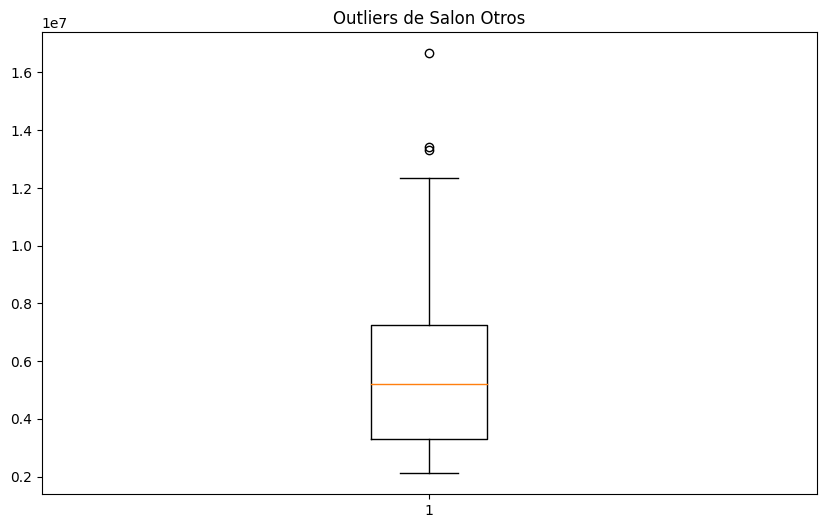

In [154]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data["otros"])
plt.title("Outliers de Salon Otros")
plt.show()

In [155]:
y = data1["otros"]
Limite_Superior = y.mean() + 2*y.std()
Limite_Inferior = y.mean() - 2*y.std()
print("Limite  superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite  superior permitido 12215263.136218155
Limite inferior permitido -663256.0767104644


In [156]:
outliers = data1[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,1.266927e+07,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4819479.554,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,1.218755e+07,13433071.98
61,61,01/02/2022,152202.6,23802.1,152202573.4,148406529.3,3796044.076,152202573.4,46290956.21,45283575.25,...,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,1832572.100,9.189746e+06,13301387.17
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,1.203960e+07,12349980.06


In [159]:
data_clean_otros = data1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean_otros
data_clean_otros.to_csv("data_clean_otros.csv")

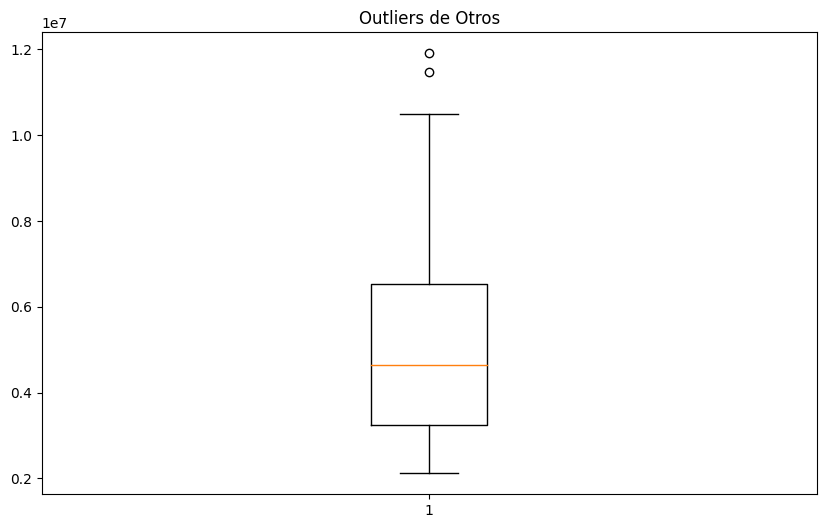

In [158]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(data_clean_otros["otros"])
plt.title("Outliers de Otros")
plt.show()